# The Titanic Project (Keggle)

@ This is my take on the Titanic problem from keggle, where one needs to predict survavibility of the Titranic's passangers, taking in into account the availible data recordsf of the passangers

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [478]:
df_test= pd.read_csv(r'C:\Users\Smelly_Giraffe\Documents\DataWorks\Titanic\DataSource\test.csv')
df_train= pd.read_csv(r'C:\Users\Smelly_Giraffe\Documents\DataWorks\Titanic\DataSource\train.csv')
df_gender= pd.read_csv(r'C:\Users\Smelly_Giraffe\Documents\DataWorks\Titanic\DataSource\gender_submission.csv')

In [479]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Inspect for missing values

Text(0.5, 1.0, 'Missing values heatmap')

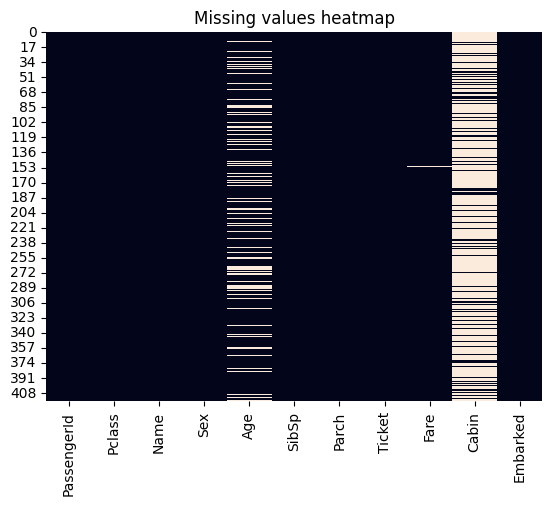

In [480]:
sns.heatmap(df_test.isnull(), cbar = False).set_title("Missing values heatmap")

In [481]:
df_test['Fare'].isnull().sum()

1

In [482]:
df_test.dropna(subset=['Fare'], inplace = True)
df_test['Fare'].isnull().sum()

0

Text(0.5, 1.0, 'Missing values heatmap')

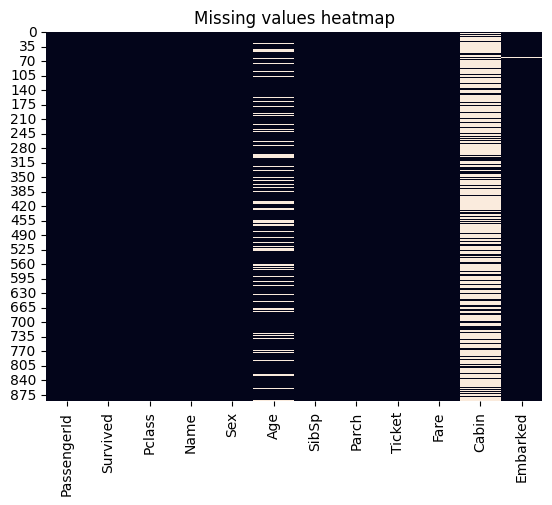

In [483]:
sns.heatmap(df_train.isnull(), cbar = False).set_title("Missing values heatmap")

In [484]:
df_train.dropna(subset=['Embarked'], inplace = True)
df_train['Embarked'].isnull().sum()

0

### Categorical enconding for 'Sex'

In [485]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1}).astype(int)

In [486]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [487]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1}).astype(int)

### Numerical categorical enconding for "Embarked"

In [488]:
df_test['Embarked'] = df_test['Embarked'].map({'S': 1, 'C': 2, 'Q': 3 }).astype(int)

In [489]:
df_train['Embarked'] = df_train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3 }).astype(int)

### Numverical categorical enconding for "Cabin"

In [490]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
C22 C26        3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 146, dtype: int64

In [491]:
########################

In [492]:
def cabin_encoder (letter, df):
    """If the entry in the column starts with a certain letter, this function replaces it by the same letter."""

    condition = df['Cabin'].str.startswith(letter)
    df.loc[condition, 'Cabin'] = letter
    
    return None
        
def transformer_cabin (dataframe):
    """Renames the Nans into 'Others' and it categorizes all the entries of the cabins"""
    
    df_cabin_class = dataframe[['Cabin']].copy()
    df_cabin_class['Cabin'] = df_cabin_class['Cabin'].fillna('Other')
    
    for i in ('A','B','C','D','E','F','G','H','T'):
        # print ('Transforming entries:',i)
        cabin_encoder (i, df_cabin_class)
        
    from sklearn.preprocessing import OrdinalEncoder
    
    ordinal_encoder = OrdinalEncoder()
    df_cabin_class_encoded = ordinal_encoder.fit_transform(df_cabin_class)
    
    df_cabin_class_encoded = df_cabin_class_encoded.astype(int)
    df_cabin_class['CabinEncoded']=pd.Series(df_cabin_class_encoded[:,0])
    
    ####################################### Adding df_cabin_class back to the traiing set ############
    df_cabin_class = df_cabin_class.rename({"Cabin": "CabinClass"}, axis=1)
    dataframe = pd.concat([dataframe, df_cabin_class],axis=1)
    
    return dataframe

df_train = transformer_cabin (df_train)
df_test = transformer_cabin (df_test)

In [493]:
###################################

### Looking at the data set now

In [494]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinClass,CabinEncoded
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,Other,7.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,Other,7.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,C,2.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,Other,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,1,Other,7.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1,B,2.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,1,Other,7.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2,C,NaN


### Take care of the age missing values with SVC

In [495]:
from sklearn.svm import SVC

In [496]:
def transformer_age(df):
    # Rounding the Age
    df['Age'] = df.Age.round()

    # Separating the data to predict the missing ages
    X_train = df[df.Age.notnull()][['Pclass','Sex','SibSp','Parch', 'Fare']]
    X_test = df[df.Age.isnull()][['Pclass','Sex','SibSp','Parch', 'Fare']]
    y = df.Age.dropna()

    # Predicting the missing ages
    age_classifier = SVC()
    age_classifier.fit(X_train, y)
    prediction = age_classifier.predict(X_test)
    agePrediction = pd.DataFrame(data=prediction,index=X_test.index.values,columns=['Age']) # this preserves the index values of the original array

    df = df.combine_first(agePrediction)

    # Just confirming if there is no more ages missing
    df.Age.isnull().sum()
    
    return df

In [522]:
df_train = transformer_age(df_train)
df_test = transformer_age(df_test)

In [523]:
df_test['Age'].isnull().sum()

0

In [524]:
df_train['Age'].isnull().sum()

0

### Other Checks

<AxesSubplot: xlabel='Sex'>

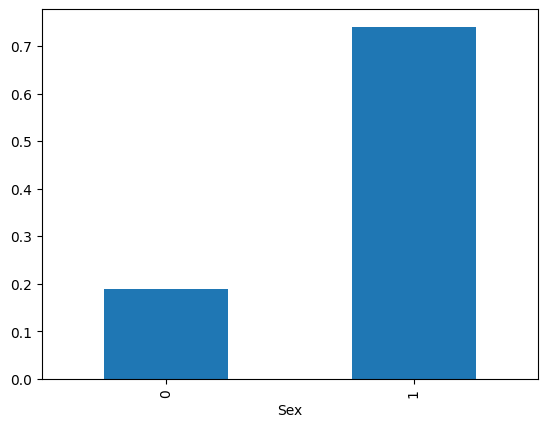

In [525]:
df_train.groupby('Sex').Survived.mean().plot(kind='bar')

<AxesSubplot: xlabel='Pclass'>

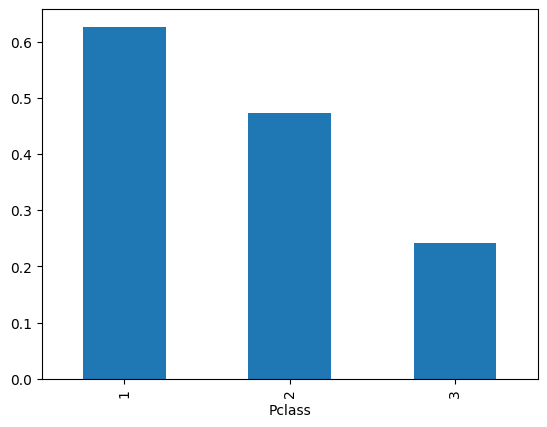

In [526]:
df_train.groupby('Pclass').Survived.mean().plot(kind='bar')

<AxesSubplot: xlabel='Pclass'>

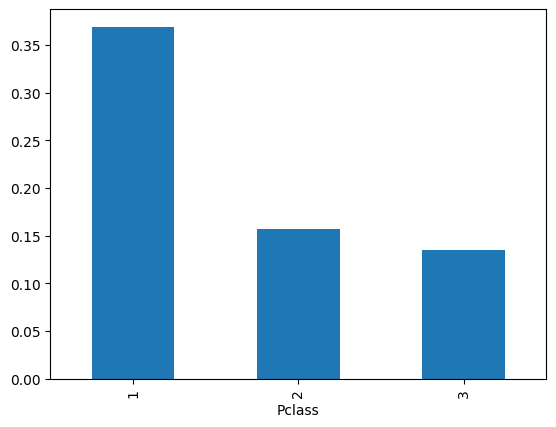

In [527]:
df_train.query('Sex == 0').groupby('Pclass').Survived.mean().plot(kind='bar') ## survivalbility of males

<AxesSubplot: xlabel='Pclass'>

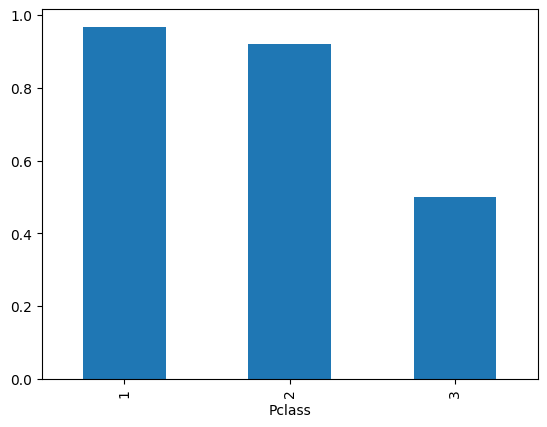

In [528]:
df_train.query('Sex == 1').groupby('Pclass').Survived.mean().plot(kind='bar') ## survivalbility of females

<AxesSubplot: xlabel='CabinClass'>

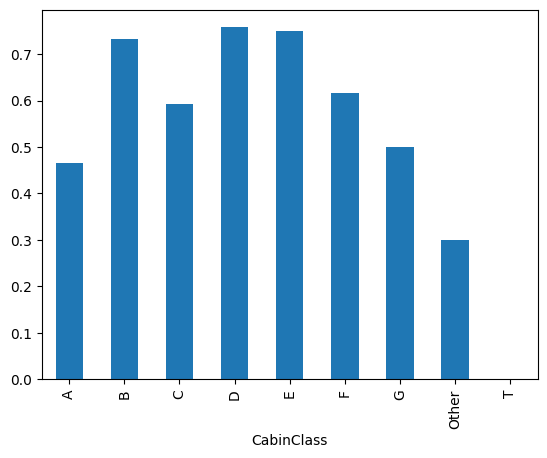

In [529]:
df_train.groupby('CabinClass').Survived.mean().plot(kind='bar')

<AxesSubplot: xlabel='CabinClass'>

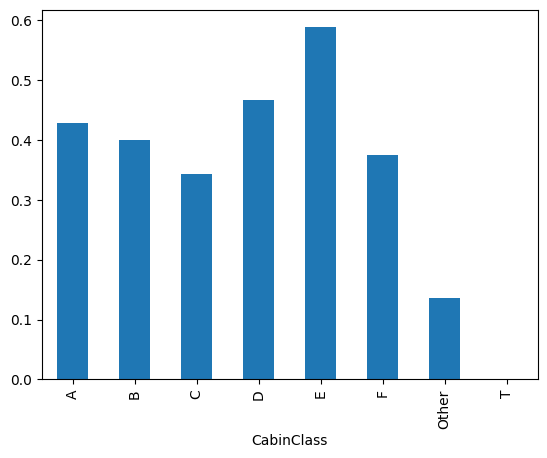

In [530]:
df_train.query('Sex == 0').groupby('CabinClass').Survived.mean().plot(kind='bar') ## survivalbility of males by cabin class

<AxesSubplot: xlabel='CabinClass'>

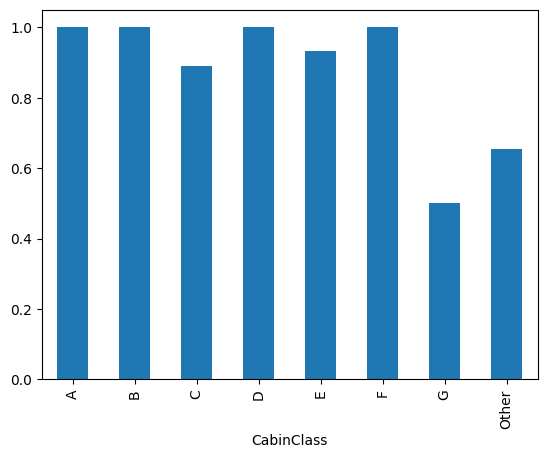

In [531]:
df_train.query('Sex == 1').groupby('CabinClass').Survived.mean().plot(kind='bar') ## survivalbility of females by cabin class

## Some more "in detail" barplots

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

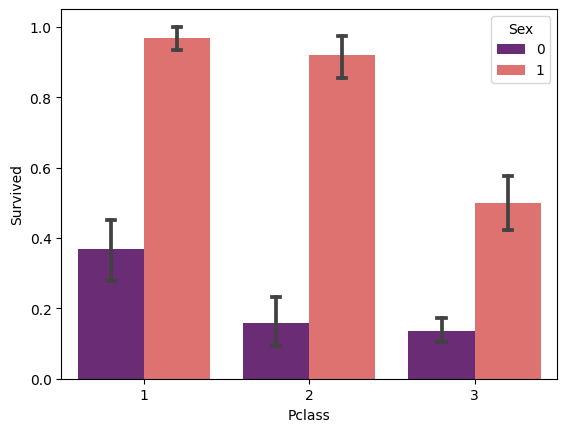

In [532]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train,
            palette = 'magma',  
            capsize = 0.05,                       
            )

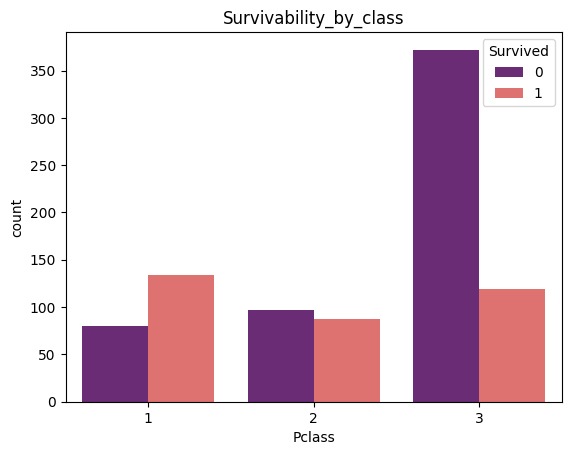

In [533]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, palette = 'magma')  #### for nice counplots
plt.title('Survivability_by_class')
plt.show()

In [534]:
df_train['Age_Category'] = pd.cut(df_train['Age'], bins=[0,10,20,30,40,50,60,70], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-on'])

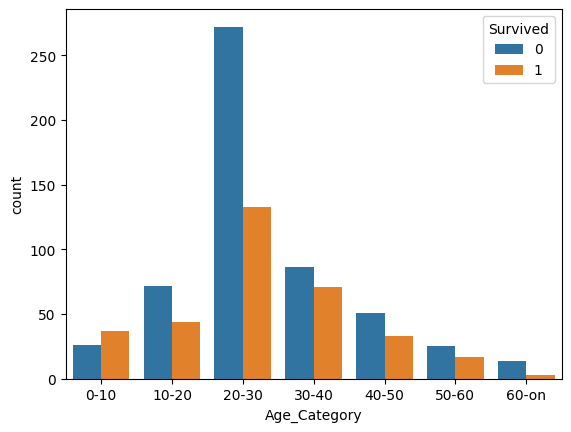

In [535]:
sns.countplot(x = 'Age_Category', hue = 'Survived', data = df_train)  #### for nice counplots
# plt.title('Survivability_by_class')
plt.show()

<AxesSubplot: xlabel='Embarked', ylabel='count'>

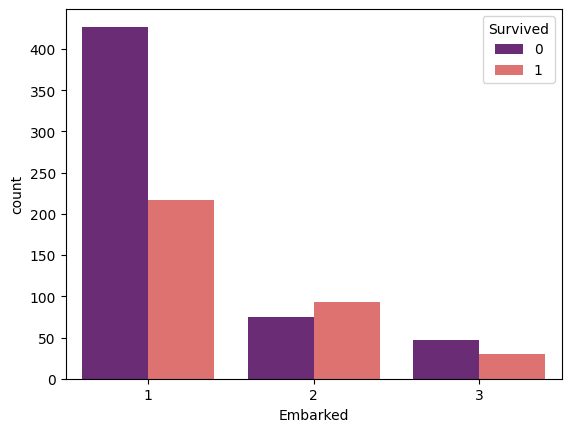

In [536]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = df_train,
            palette = 'magma',  
            capsize = 0.05,                       
            )

## Some conclusions from the barplots

@ The females had much higher survivabiluity rate then males.

@ People in the upper classes had much higher survivability then males

# Applying machine learning techniques to fit the data an make predictions

## Support vector machine

In [537]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [538]:
# Taking only the features that is important for now
X = df_train[['Sex']]

# Taking the labels (Survived or Not Survived)
Y = df_train['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [539]:
# Declaring the SVC with no tunning
classifier2 = SVC()

# Fitting the data. This is where the SVM will learn
classifier2.fit(X_train, Y_train)

# Predicting the result and giving the accuracy
score2 = classifier2.score(x_test, y_test)

print(score2)

0.7191011235955056


## Random Forest

In [565]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix

In [541]:
df_train_cut = df_train.drop(['Cabin','Name','Ticket','PassengerId','Cabin','CabinClass','Age_Category'],axis=1)

In [551]:
df_train_cut.dropna(inplace=True) # taking away two NaN entries

In [552]:
# Taking only the features that is important for now
X = df_train_cut.drop(['Survived'],axis=1)

# Taking the labels (Survived or Not Survived)
Y = df_train_cut['Survived']

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [553]:
clf = RandomForestClassifier(criterion='entropy', 
                             n_estimators=500,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)

In [554]:
clf.fit(X_train,  np.ravel(Y_train))

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=500, n_jobs=-1, oob_score=True,
                       random_state=1)

In [555]:
print("RF Accuracy: " + repr(round(clf.score(x_test, y_test) * 100, 2)) + "%")

RF Accuracy: 78.09%


In [561]:
result_rf = cross_val_score(clf, X_train, Y_train, cv=10, scoring='accuracy')
print('The cross validated score for Random forest is:', round(result_rf.mean() * 100, 2), '%')

The cross validated score for Random forest is: 83.22 %


In [563]:
Y_pred = cross_val_predict(clf,X_train,Y_train,cv = 10)

Text(0.5, 1.05, 'Confusion_matrix for RF')

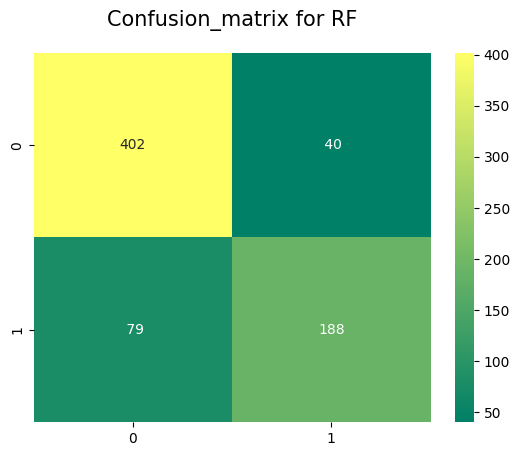

In [566]:
sns.heatmap(confusion_matrix(Y_train,Y_pred),annot = True,fmt = '3.0f',cmap = "summer")
plt.title('Confusion_matrix for RF', y = 1.05, size = 15)

# Show the most important features (from the Random forest classifier)

In [569]:
feature_importances = clf.feature_importances_
feature_importances

attributes = df_train_cut.columns
attributes

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3158786301200442, 'Sex'),
 (0.22527247052311455, 'Fare'),
 (0.18035215568486715, 'Age'),
 (0.092432876613003, 'Pclass'),
 (0.052708500917894606, 'SibSp'),
 (0.05036058394851174, 'CabinEncoded'),
 (0.042627757439451436, 'Embarked'),
 (0.04036702475311328, 'Parch')]

@ It appears that indeed Sex, Fare and Age are the most important factors for survivability on the Titanic

# Naive Bayes

In [570]:
from sklearn.naive_bayes import GaussianNB

In [571]:
# Taking only the features that is important for now
# X = df_train_cut[['Sex']]
X = df_train_cut.drop(['Survived'],axis=1)

# Taking the labels (Survived or Not Survived)
Y = df_train_cut[['Survived']]

# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [572]:
NB = GaussianNB()
NB.fit(X_train,  np.ravel(Y_train))

GaussianNB()

In [573]:
print("NB Accuracy: " + repr(round(NB.score(x_test, y_test) * 100, 2)) + "%")

NB Accuracy: 69.66%


In [574]:
result_rf=cross_val_score(NB,Y_train,Y_train,cv=10,scoring='accuracy')
print('The cross validated score for Random forest is:',round(result_rf.mean()*100,2))

The cross validated score for Random forest is: 100.0


C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A colu

In [575]:
Y_pred = cross_val_predict(NB,X_train,Y_train,cv=10)

C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smelly_Giraffe\.conda\envs\DataWorksEnv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A colu

Text(0.5, 1.05, 'Confusion_matrix for NB')

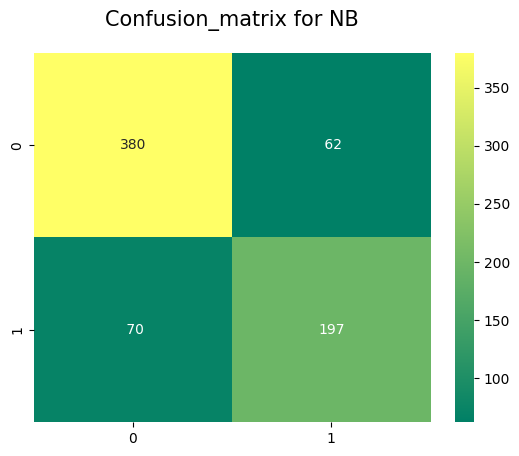

In [576]:
sns.heatmap(confusion_matrix(Y_train,Y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix for NB', y=1.05, size=15)